In [41]:
# Read CSV
import pandas as pd

In [42]:
# Read city data
city = pd.read_csv("raw_data/city_data.csv")

In [43]:
# Read ride data
ride = pd.read_csv("raw_data/ride_data.csv")


In [44]:
# Total rides per city
cityRides = ride.groupby("city")["ride_id"].count().to_frame().reset_index()
cityAvgFair = ride.groupby("city")["fare"].mean().to_frame().reset_index()

In [45]:
# Create df for plotting

from functools import reduce

merge = [city, cityRides, cityAvgFair]
df = reduce(lambda left, right: pd.merge(left, right, on = "city"), merge)
df = df.rename(columns = {"ride_id": "# rides",
                        "fare": "avg fares",
                        "driver_count": "# drivers"
                         })
df.head()

,city,# drivers,type,# rides,avg fares
0,Kelseyland,63,Urban,28,21.806429
1,Nguyenbury,8,Urban,26,25.899615
2,East Douglas,12,Urban,22,26.169091
3,West Dawnfurt,34,Urban,29,22.330345
4,Rodriguezburgh,52,Urban,23,21.332609


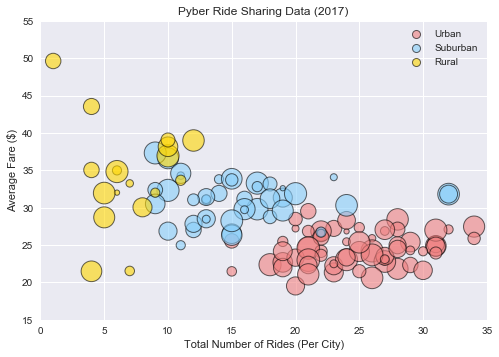

In [62]:
# BUBBLE PLOT

import seaborn as sns
import matplotlib.pyplot as plt

types = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]

for i, t in enumerate(types):
    
    xi = df["# rides"][df["type"] == t]
    yi = df["avg fares"][df["type"] == t]
          
    plt.scatter(x = xi, y = yi,
           s = df["# drivers"] * 7,
           c = colors[i],
           alpha = .6, linewidth = 1, edgecolors = 'black',
           label = t)
    
plt.legend(markerscale = .5)
plt.xlim(0, 35)
plt.ylim(15, 55)
plt.title("Pyber Ride Sharing Data (2017)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.show()

In [68]:
# df for pie charts
cityTotFare = ride.groupby("city")["fare"].sum().to_frame().reset_index()
cityRides = ride.groupby("city")["ride_id"].count().to_frame().reset_index()

from functools import reduce

merge = [city, cityRides, cityTotFare]
pie = reduce(lambda left, right: pd.merge(left, right, on = "city"), merge)
pie = pie.rename(columns = {"ride_id": "# rides",
                        "fare": "Total fares",
                        "driver_count": "# drivers"
                         }).drop("city",1).groupby("type").sum().reset_index()
pie.sort_index(ascending = False, inplace = True)
pie.head()

,type,# drivers,# rides,Total fares
2,Urban,2607,1625,40078.34
1,Suburban,638,657,20335.69
0,Rural,104,125,4255.09


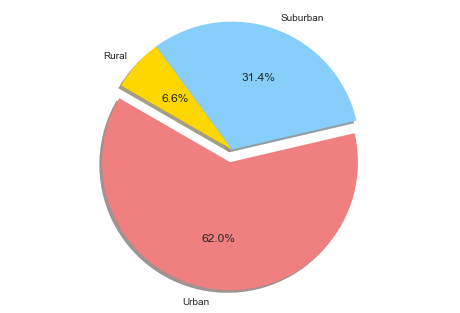

In [75]:
# % of Total Fares by City Type

plt.pie(pie["Total fares"], labels = types, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 150,
       explode = (.1,0,0))
plt.axis("equal")
plt.show()

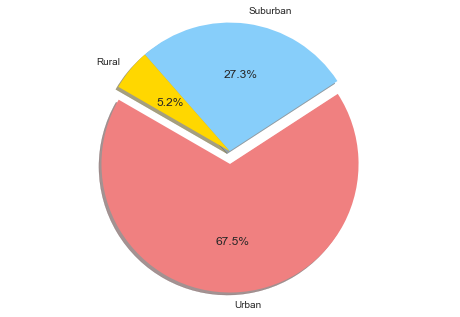

In [76]:
# % of Total Rides by City Type

plt.pie(pie["# rides"], labels = types, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 150,
       explode = (.1,0,0))
plt.axis("equal")
plt.show()

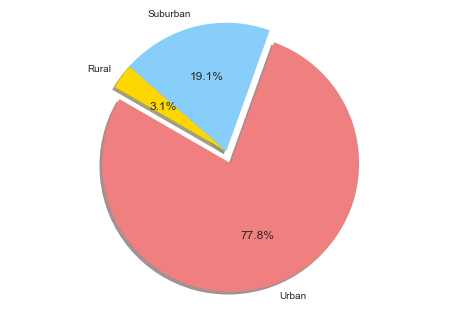

In [77]:
# % of Total Drivers by City Type

plt.pie(pie["# drivers"], labels = types, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 150,
       explode = (.1,0,0))
plt.axis("equal")
plt.show()